In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from collections import Counter

In [2]:
# Read csv file
file_path = r"C:\Users\hankc\OneDrive\桌面\py4e\cleaned_ebay_Laptop_Product.csv"
data = pd.read_csv(file_path, encoding='latin-1')
data.head(8)

,Product_Name,Product_Price,Place_of_shipment,Review,Shipping_Cost
0,"Dell 14"" TOUCHSCREEN Laptop Quad-Core Intel i5...",6322,United States,5720,1228
1,"FAST HP 15.6"" Laptop Intel Core i7 2.7GHz 16GB...",6322,United States,5720,1448
2,Lenovo ThinkPad L15 Gen 2 15.6?? FHD Laptop C...,9563,United States,115408,1334
3,Dell Latitude 7400 Gaming Laptop PC Intel Core...,17800,United States,4960,1469
4,"Acer Aspire Nitro Black Edition N15W7 15.6"" i7...",5431,United States,91550,1572
5,Cheap iCore Laptop Lenovo HP Dell Core i3 i5 8...,3122,United Kingdom,1673,1825
6,HP Laptop 17-by4xxx Core i5-1135G7 @ 2.4GHz 12...,2886,United States,68886,2983
7,Cheap Fast Windows 10 Laptop CORE i5 8GB RAM 2...,3953,United Kingdom,31132,0


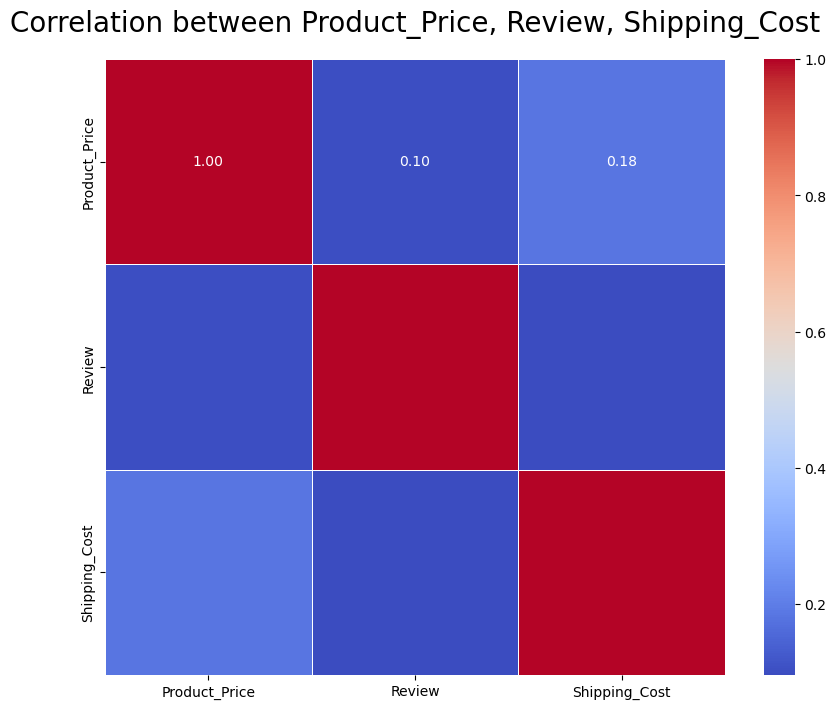

In [3]:
# Select required columns from data
selected_columns = data[['Product_Price', 'Review', 'Shipping_Cost']]

# Convert selected columns to a NumPy array
selected_data = selected_columns.to_numpy()

# Calculate correlation matrix
correlation_matrix = np.corrcoef(selected_data, rowvar=False)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, 
            xticklabels=['Product_Price', 'Review', 'Shipping_Cost'],
            yticklabels=['Product_Price', 'Review', 'Shipping_Cost'])
plt.title('Correlation between Product_Price, Review, Shipping_Cost', pad=20, fontsize=20)
plt.show()

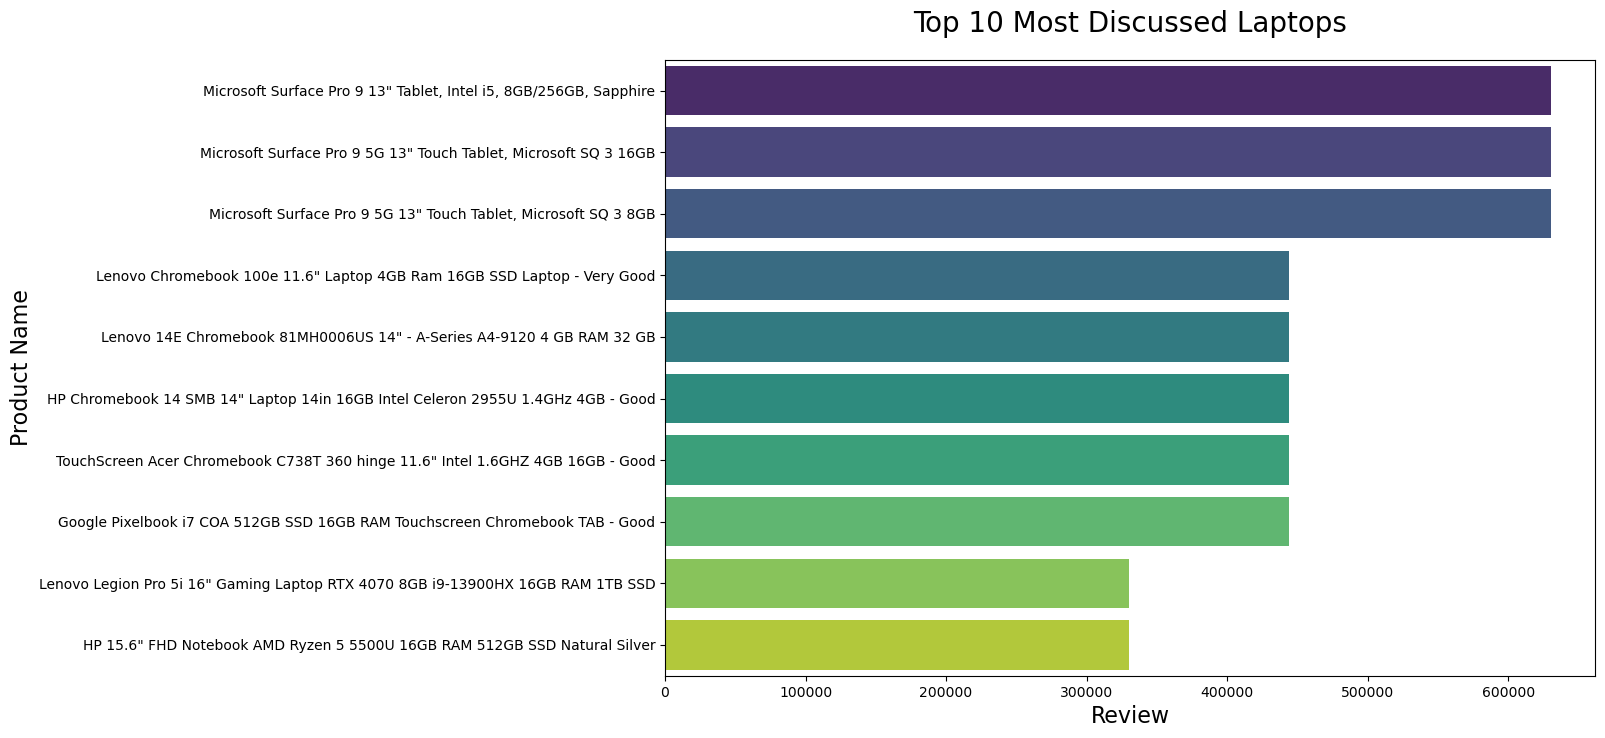

In [4]:
# Select the top 10 products with the most reviews
top_10_reviews = data.nlargest(10, 'Review')

# Select required columns from top_10_reviews
products = top_10_reviews['Product_Name']
reviews = top_10_reviews['Review']

# Plot barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=reviews, y=products, palette='viridis')
plt.title('Top 10 Most Discussed Laptops', pad=20, fontsize=20)
plt.xlabel('Review', fontsize=16)
plt.ylabel('Product Name', fontsize=16)
plt.show()

In [5]:
# Select ['Place_of_shipment'] from data
Place_of_shipment = data['Place_of_shipment']

# Define a function to classify ['Place_of_shipment'] into 3 portion: United States, United Kingdom and Others
# And then count them
def count_locations(list):
    counts = Counter()
    for location in list:
        location = location.strip().lower()
        if location == 'united states':
            counts['United States'] += 1
        elif location == 'united kingdom':
            counts['United Kingdom'] += 1
        else:
            counts['Others'] += 1    
    return counts

# Execute count_locations()
location_counts = count_locations(Place_of_shipment)
print(location_counts)

Counter({'United States': 1947, 'United Kingdom': 784, 'Others': 183})


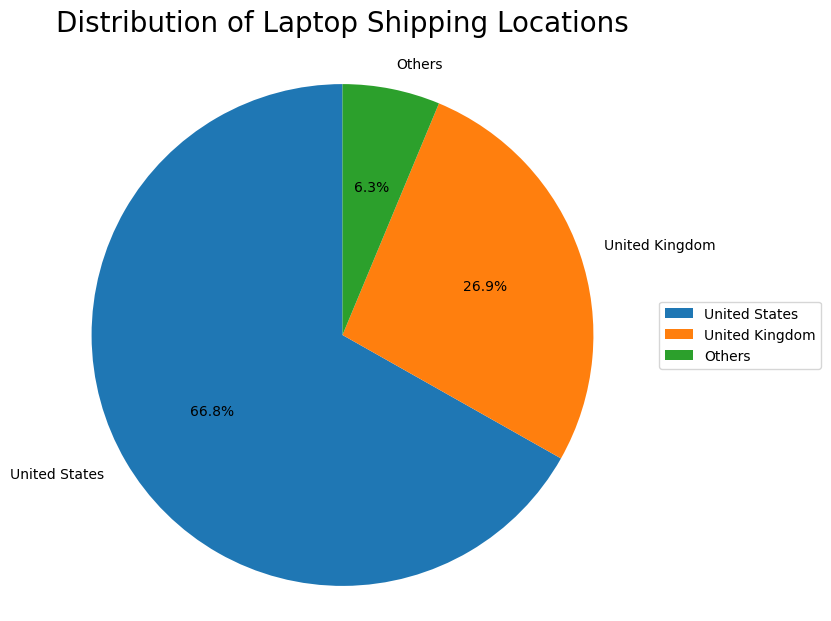

In [6]:
# Extract labels and values from location_counts
labels = location_counts.keys()
values = location_counts.values()

# Plot pieplot
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Laptop Shipping Locations', pad=20, fontsize=20)  
plt.subplots_adjust(top=0.8) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.show()

In [7]:
# Select ['Place_of_shipment'] from data
# Standardize the format: 
# Strip space from both ends of the string
# Convert the string to lowercase
data['Place_of_shipment'] = data['Place_of_shipment'].str.strip().str.lower()
print(data['Place_of_shipment'].unique())

['united states' 'united kingdom' 'australia' 'italy' 'lithuania' 'france'
 'germany' 'canada' 'japan' 'china' 'poland' 'south korea' 'austria'
 'albania' 'israel' 'hong kong' 'romania' 'slovenia']


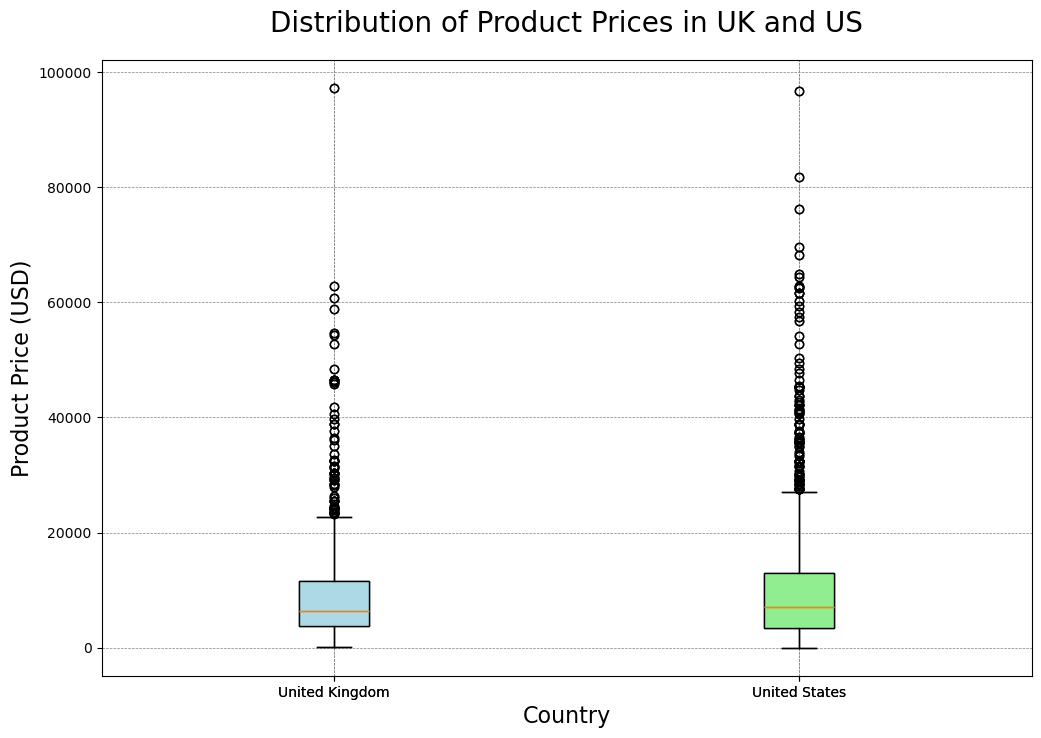

In [8]:
# Select ['Product_Price'] from united kingdom and united states from data['Place_of_shipment']
uk_prices = data[data['Place_of_shipment'] == 'united kingdom']['Product_Price']
us_prices = data[data['Place_of_shipment'] == 'united states']['Product_Price']
prices_data = [uk_prices, us_prices]

# Plot boxplot
plt.figure(figsize=(12, 8))
plt.title('Distribution of Product Prices in UK and US', pad=20, fontsize=20) 
plt.xlabel('Country', fontsize=16)
plt.ylabel('Product Price (USD)', fontsize=16)
plt.boxplot(prices_data, labels=['United Kingdom', 'United States'], patch_artist=True)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Adjust the bar colors to light blue and light green
colors = ['lightblue', 'lightgreen']
for patch, color in zip(plt.boxplot(prices_data, labels=['United Kingdom', 'United States'], patch_artist=True)['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()

In [9]:
# Calculate average and median Product price in UK and US
uk_mean_price = np.mean(uk_prices)
us_mean_price = np.mean(us_prices)
uk_median_price = np.median(uk_prices)
us_median_price = np.median(us_prices)

print('uk_mean_price: {:.2f}'.format(uk_mean_price))
print('us_mean_price: {:.2f}'.format(us_mean_price))
print('uk_median_price: {:.2f}'.format(uk_median_price))
print('us_median_price: {:.2f}'.format(us_median_price))

uk_mean_price: 9425.42
us_mean_price: 9925.28
uk_median_price: 6306.00
us_median_price: 7052.00


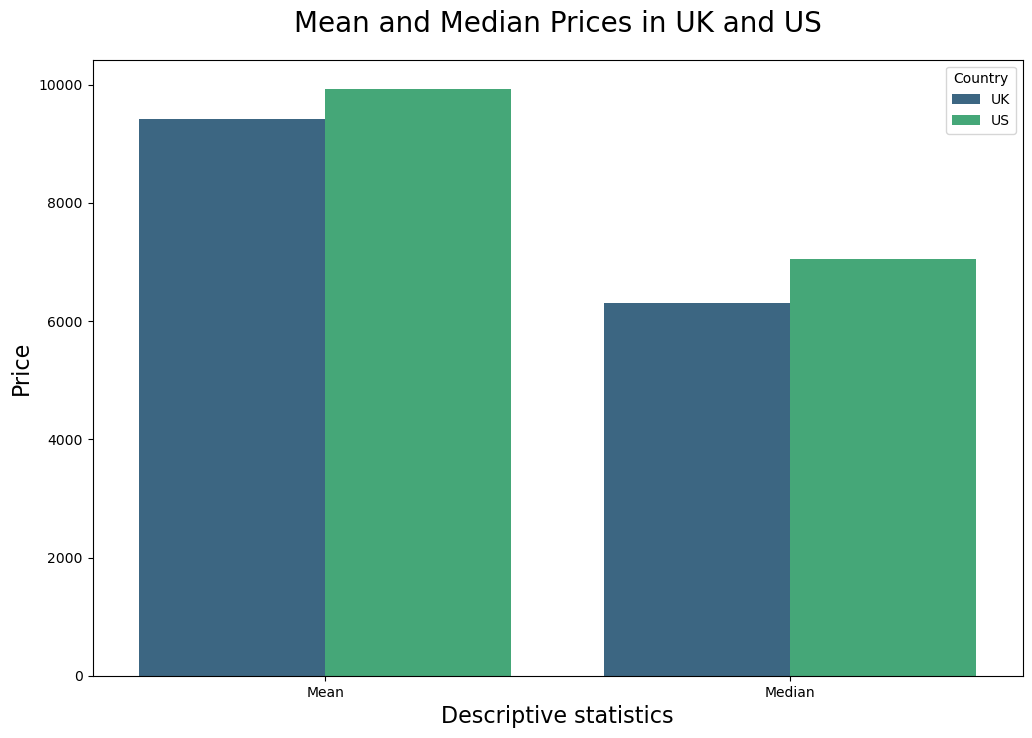

In [10]:
# Set a dictionary including Country, Descriptive statistics and Price
data = {
    'Country': ['UK', 'UK', 'US', 'US'],
    'Descriptive statistics': ['Mean', 'Median', 'Mean', 'Median'],
    'Price': [uk_mean_price, uk_median_price, us_mean_price, us_median_price]
}

data = pd.DataFrame(data)

# Plot barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Descriptive statistics', y='Price', hue='Country', data=data, palette='viridis')
plt.title('Mean and Median Prices in UK and US', pad=20, fontsize=20)
plt.xlabel('Descriptive statistics', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.show()